In [0]:
# Import all the necessary libaries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [3]:
#Reading the Titanic dataset using pandas library to explore the dataset
titanic = pd.read_csv('titanic.csv')

# to print number of rows and columns
print('number of rows and columns')
print(titanic.shape) 
print() #prints empty line between results

#to study the datatypes of the attributes
print('datatypes of the attributes')
print(titanic.dtypes)
print()#prints empty line between results

#to display the overview of the dataset
print('Overview of the data')
titanic.head()

number of rows and columns
(1310, 14)

datatypes of the attributes
pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Overview of the data


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [0]:
#Preprocessing functions to preprocess data

# Function to drop unused columns from the dataset
def drop_unused_columns(titanic):
	return titanic.drop(columns=['name','ticket','cabin','boat','body','home.dest'],axis=1)

# Function to convert categorical values to numbers
def convert_categorical_to_numbers(titanic):
  from sklearn.preprocessing import LabelEncoder
  labelencoder= LabelEncoder()
  titanic.iloc[:,2]  =  labelencoder.fit_transform(titanic.iloc[:,2].values)
  titanic.iloc[:,7]  =  labelencoder.fit_transform(titanic.iloc[:,7].values)
  return titanic
  
# Function to drop rows with na values
def drop_rows_with_na(titanic):
	titanic = titanic.dropna(subset=['pclass','survived','sex','age','sibsp','parch','fare','embarked'])
	return titanic

# Function to reorder the columns
def reorder_columns(titanic):
 titanic = titanic[['survived','pclass','sex','age','sibsp','parch','fare','embarked']]
 return titanic

#Creating an object to append all the accuracy values to visulaize at the end.
all_accuracies = {}

In [5]:
#Data preprocessed - using preprocessing functions, #exploring the manipulated data

#drop unused columns
titanic = drop_unused_columns(titanic)

#drop rows with na values
titanic = drop_rows_with_na(titanic)

#reorder the columns
titanic = reorder_columns(titanic)

#convert categorical values to numbers
titanic = convert_categorical_to_numbers(titanic)

#print the values in the data post preprocessing
print('Dataset after preprocessing')
print(titanic)

#Generate descriptive statistics of the attributes
print('Descriptive statistics')
titanic.describe()

Dataset after preprocessing
      survived  pclass  sex      age  sibsp  parch      fare  embarked
0          1.0     1.0    0  29.0000    0.0    0.0  211.3375         2
1          1.0     1.0    1   0.9167    1.0    2.0  151.5500         2
2          0.0     1.0    0   2.0000    1.0    2.0  151.5500         2
3          0.0     1.0    1  30.0000    1.0    2.0  151.5500         2
4          0.0     1.0    0  25.0000    1.0    2.0  151.5500         2
...        ...     ...  ...      ...    ...    ...       ...       ...
1301       0.0     3.0    1  45.5000    0.0    0.0    7.2250         0
1304       0.0     3.0    0  14.5000    1.0    0.0   14.4542         0
1306       0.0     3.0    1  26.5000    0.0    0.0    7.2250         0
1307       0.0     3.0    1  27.0000    0.0    0.0    7.2250         0
1308       0.0     3.0    1  29.0000    0.0    0.0    7.8750         2

[1043 rows x 8 columns]
Descriptive statistics


,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.407478,2.209012,0.629914,29.813199,0.504314,0.421860,36.603024,1.545542
std,0.491601,0.840685,0.483059,14.366261,0.913080,0.840655,55.753648,0.809366
min,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000,1.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.750000,2.000000
75%,1.000000,3.000000,1.000000,39.000000,1.000000,1.000000,35.077100,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


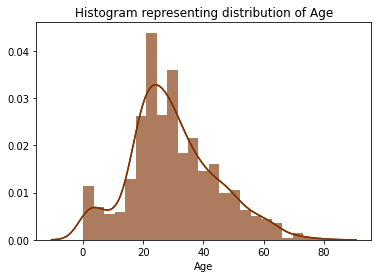

In [6]:
#to visualize the distribution of passengers by "Age"
matplotlib_Axes = sns.distplot(titanic['age'], color="#803305")
sns.distplot(titanic['age'], color="#803305").set(xlabel='Age',
                                                  title="Histogram representing distribution of Age")
plt.show()

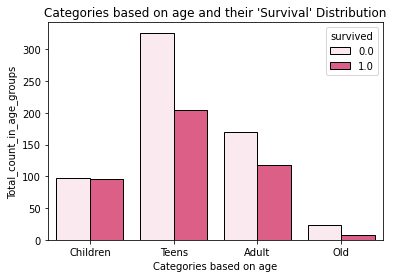

In [7]:
#to visulaize the chances of survival for passengers in different age groups - Children,adults,teens and old aged
interval = (0,18,35,60,120)
categories_based_on_age = ['Children','Teens','Adult', 'Old']
titanic['Age_categories'] = pd.cut(titanic.age, interval, labels = categories_based_on_age)
matplotlib_Axes = sns.countplot(x = 'Age_categories',  data = titanic, hue = 'survived', edgecolor = "black", color = "#f04a7f")
matplotlib_Axes.set(xlabel='Categories based on age', ylabel='Total_count_in_age_groups',
       title="Categories based on age and their 'Survival' Distribution")
plt.show()

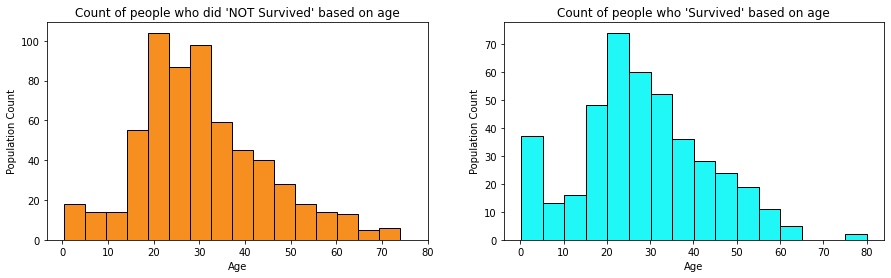

In [8]:
#to visulaize count of passengers who survived and who did not survive based on age
fig, matplotlib_Axes = plt.subplots(1, 2, figsize = (15, 4))
titanic[titanic["survived"] == 0]["age"].plot.hist(ax = matplotlib_Axes[0], bins = 16, edgecolor = "black", color = "#f78f20")
matplotlib_Axes[0].set_title("Count of people who did 'NOT Survived' based on age")
matplotlib_Axes[0].set_xlabel("Age")
matplotlib_Axes[0].set_ylabel("Population Count")
domain_1 = list(range(0, 85, 10))
matplotlib_Axes[0].set_xticks(domain_1)
titanic[titanic["survived"] == 1]["age"].plot.hist(ax = matplotlib_Axes[1], bins = 16, edgecolor = "black", color = "#20f7f7")
matplotlib_Axes[1].set_title("Count of people who 'Survived' based on age")
matplotlib_Axes[1].set_xlabel("Age")
matplotlib_Axes[1].set_ylabel("Population Count")
domain_2 = list(range(0, 85, 10))
matplotlib_Axes[1].set_xticks(domain_2)
plt.show()

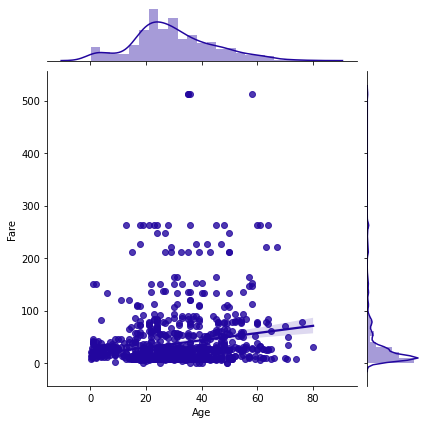

In [9]:
#visualize relationship between passenger age and fare
matplotlib_Axes = sns.jointplot(data=titanic, x='age', y='fare', kind='reg', color='#22069e')
matplotlib_Axes.ax_joint.set_xlabel("Age")
matplotlib_Axes.ax_joint.set_ylabel("Fare")
plt.show()

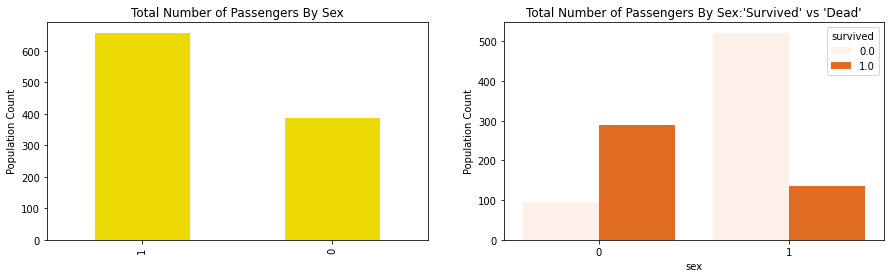

In [10]:
#Visualize the count of passenger based on sex and their survival chances,
#0- female, 1-male , 0-unsurvived, 1-survived
fig, matplotlib_Axes = plt.subplots(1, 2, figsize = (15, 4))
titanic["sex"].value_counts().plot.bar(color = "#edda05", ax = matplotlib_Axes[0])
matplotlib_Axes[0].set_title("Total Number of Passengers By Sex")
matplotlib_Axes[0].set_ylabel("Population Count")
sns.countplot("sex", hue = "survived", data = titanic, ax = matplotlib_Axes[1],color='#ff6600')
matplotlib_Axes[1].set_title("Total Number of Passengers By Sex:'Survived' vs 'Dead'")
matplotlib_Axes[1].set_ylabel("Population Count")
plt.show()

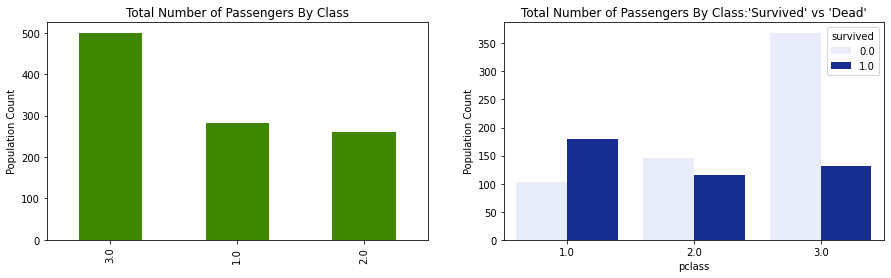

In [11]:
#Visualize the count of passenger based on class and their survival chances,
#1-firstClass, 2-SecondClass,3-ThirdClass , 0-unsurvived, 1-survived
fig, matplotlib_Axes = plt.subplots(1, 2, figsize = (15, 4))
titanic["pclass"].value_counts().plot.bar(color = "#408701", ax = matplotlib_Axes[0])
matplotlib_Axes[0].set_title("Total Number of Passengers By Class")
matplotlib_Axes[0].set_ylabel("Population Count")
sns.countplot("pclass", hue = "survived", data = titanic, ax = matplotlib_Axes[1],color='#0321a3')
matplotlib_Axes[1].set_title("Total Number of Passengers By Class:'Survived' vs 'Dead'")
matplotlib_Axes[1].set_ylabel("Population Count")
plt.show()

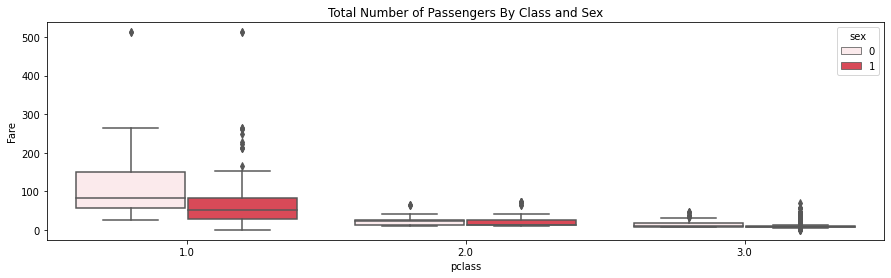

In [12]:
#visualize passenger fare with respect to their clas
fig, matplotlib_Axes = plt.subplots(1, figsize = (15, 4))
sns.boxplot(x='pclass',y='fare',hue='sex',data=titanic,color='#f03245')
matplotlib_Axes.set_title("Total Number of Passengers By Class and Sex")
matplotlib_Axes.set_ylabel("Fare")
plt.show()

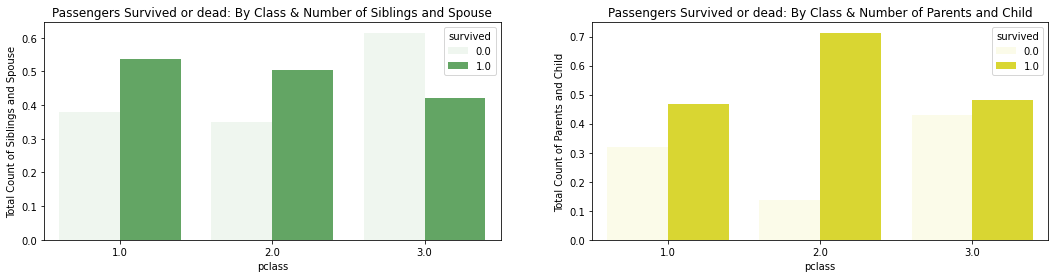

In [13]:
#Visualize the survival chnaces for passengers travelling with siblings, spouse, parents and children
#1-firstClass, 2-SecondClass,3-ThirdClass , 0-unsurvived, 1-survived
fig, matplotlib_Axes = plt.subplots(1, 2, figsize = (18, 4))
sns.barplot(x="pclass", y='sibsp',hue = "survived", data = titanic, ax = matplotlib_Axes[0],color='#58b059',ci=None)
matplotlib_Axes[0].set_title("Passengers Survived or dead: By Class & Number of Siblings and Spouse")
matplotlib_Axes[0].set_ylabel("Total Count of Siblings and Spouse")

sns.barplot(x="pclass", y='parch',hue = "survived", data = titanic, ax = matplotlib_Axes[1],color='#f5f116',ci=None)
matplotlib_Axes[1].set_title("Passengers Survived or dead: By Class & Number of Parents and Child")
matplotlib_Axes[1].set_ylabel("Total Count of Parents and Child")

plt.show()

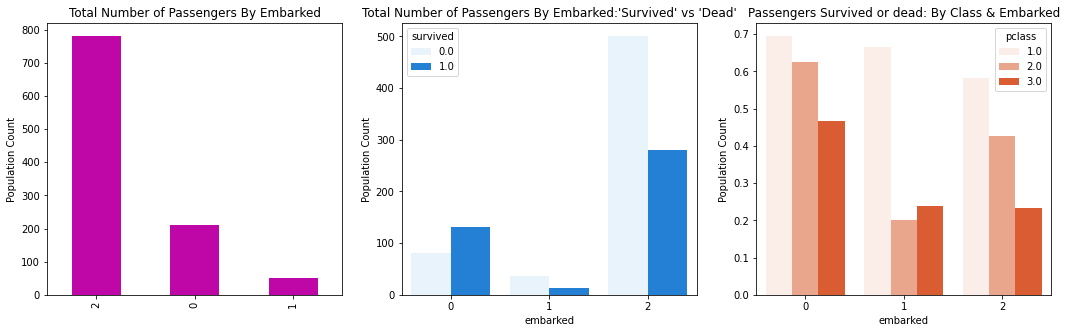

In [14]:
#Visualize the count of passenger based on embarked and their survival chances,
#1-firstClass, 2-SecondClass,3-ThirdClass , 0-unsurvived, 1-survived
#embarked -> C-Cherbourg = 0, Q- Queenstown=1, S-Southhampton=2
fig, matplotlib_Axes = plt.subplots(1, 3, figsize = (18, 5))
titanic["embarked"].value_counts().plot.bar(color = "#bf06a7", ax = matplotlib_Axes[0])
matplotlib_Axes[0].set_title("Total Number of Passengers By Embarked")
matplotlib_Axes[0].set_ylabel("Population Count")

sns.countplot("embarked", hue = "survived", data = titanic, ax = matplotlib_Axes[1],color='#0781f2')
matplotlib_Axes[1].set_title("Total Number of Passengers By Embarked:'Survived' vs 'Dead'")
matplotlib_Axes[1].set_ylabel("Population Count")

sns.barplot(x="embarked", y='survived',hue = "pclass", data = titanic, ax = matplotlib_Axes[2],color='#f54e16',ci=None)
matplotlib_Axes[2].set_title("Passengers Survived or dead: By Class & Embarked")
matplotlib_Axes[2].set_ylabel("Population Count")
plt.show()

In [15]:
# Classification models using Skikit learn

#Reading the titanic dataset
titanic = pd.read_csv('titanic.csv')

#Drop unwanted attributes
titanic = drop_unused_columns(titanic)
#drop rows with NA
titanic = drop_rows_with_na(titanic)
#re order columsn to split into depedent and independent variables
titanic = reorder_columns(titanic)
#convert categorical attributes to numeric datatype
titanic = convert_categorical_to_numbers(titanic)
Xvars= titanic.iloc[:,1:8].values
Yvars= titanic.iloc[:,0].values

#Splitting the dataset into 80% training dataset and 20% testing dataset
from sklearn.model_selection import train_test_split
train_Xvars, test_Xvars, train_Yvars, test_Yvars= train_test_split(Xvars,Yvars,test_size=0.2,random_state=0)

#Scale the data so that it is normalized 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_Xvars=sc.fit_transform(train_Xvars)
test_Xvars=sc.fit_transform(test_Xvars)

#Creating a function for classifier models.
#Models using machine learning from skikit learn library
def classification_models(train_Xvars,train_Yvars):
  
  #Logistic Regression classifier
  from sklearn.linear_model import LogisticRegression
  LogisticRegression= LogisticRegression(random_state=0)
  LogisticRegression.fit(train_Xvars,train_Yvars)

  #K nearest Neighbors classifier
  from sklearn.neighbors import KNeighborsClassifier
  KNeighborsClassifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
  KNeighborsClassifier.fit(train_Xvars,train_Yvars)

  #Gaussian Naive Bayes classifier
  from sklearn.naive_bayes import GaussianNB
  GaussianNB = GaussianNB()
  GaussianNB.fit(train_Xvars,train_Yvars)

  #Decision tree classifier
  from sklearn.tree import DecisionTreeClassifier
  DecisionTreeClassifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
  DecisionTreeClassifier.fit(train_Xvars,train_Yvars)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  RandomForestClassifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  RandomForestClassifier.fit(train_Xvars,train_Yvars)

  #Printing the training acccurcy for each model
  print('[0]Logistic Regression, Accuracy for training data:', LogisticRegression.score(train_Xvars,train_Yvars))
  print('[1]K Neighbors Training Accusracy, Accuracy for training data:', KNeighborsClassifier.score(train_Xvars,train_Yvars))
  print('[2]Gaussian NB Training Accusracy, Accuracy for training data:', GaussianNB.score(train_Xvars,train_Yvars))
  print('[3]Decision Tree Training Accusracy, Accuracy for training data:', DecisionTreeClassifier.score(train_Xvars,train_Yvars))
  print('[4]Random Forest Training Accusracy, Accuracy for training data:', RandomForestClassifier.score(train_Xvars,train_Yvars))
  
  #appending accuracy values into an object created above
  all_accuracies['Logistic Regression'] = float(LogisticRegression.score(train_Xvars,train_Yvars))
  all_accuracies['K Neighbors Classifier'] = float(KNeighborsClassifier.score(train_Xvars,train_Yvars))
  all_accuracies['Gaussian Naive Bayes'] = float(GaussianNB.score(train_Xvars,train_Yvars))
  all_accuracies['Decision Tree Classifier'] = float(DecisionTreeClassifier.score(train_Xvars,train_Yvars))
  all_accuracies['Random Forest Classifier'] = float(RandomForestClassifier.score(train_Xvars,train_Yvars))
  
  return LogisticRegression, KNeighborsClassifier, GaussianNB, DecisionTreeClassifier, RandomForestClassifier

#Calling the function for all the training data
classifier_accuracy_results = classification_models(train_Xvars,train_Yvars)

[0]Logistic Regression, Accuracy for training data: 0.7805755395683454
[1]K Neighbors Training Accusracy, Accuracy for training data: 0.8453237410071942
[2]Gaussian NB Training Accusracy, Accuracy for training data: 0.7793764988009593
[3]Decision Tree Training Accusracy, Accuracy for training data: 0.9784172661870504
[4]Random Forest Training Accusracy, Accuracy for training data: 0.9592326139088729


In [16]:
#Performance of classification models on test data using confusion matrix for accuracy
from sklearn.metrics import confusion_matrix
for i in range( len(classifier_accuracy_results) ):
  confusionMatrix=confusion_matrix(test_Yvars,classifier_accuracy_results[i].predict(test_Xvars))

  #True negative,True positive,False positive and False negative
  TrueNegative,FalsePositive,FalseNegative,TruePositive = confusion_matrix(test_Yvars,classifier_accuracy_results[i].predict(test_Xvars)).ravel()
 
 #Accuracy for testing data
  Accuracy_for_testing_data = (TruePositive+TrueNegative) / (TruePositive+TrueNegative+FalseNegative+FalsePositive)
  
  print(confusionMatrix)
  print('--------------------------------------------------------')
  print("Classifier Model ID[{}] Testing Accuracy = '{}'".format(i, Accuracy_for_testing_data ))
  print()

[[103  23]
 [ 19  64]]
--------------------------------------------------------
Classifier Model ID[0] Testing Accuracy = '0.7990430622009569'

[[117   9]
 [ 28  55]]
--------------------------------------------------------
Classifier Model ID[1] Testing Accuracy = '0.8229665071770335'

[[97 29]
 [19 64]]
--------------------------------------------------------
Classifier Model ID[2] Testing Accuracy = '0.7703349282296651'

[[104  22]
 [ 28  55]]
--------------------------------------------------------
Classifier Model ID[3] Testing Accuracy = '0.7607655502392344'

[[115  11]
 [ 32  51]]
--------------------------------------------------------
Classifier Model ID[4] Testing Accuracy = '0.7942583732057417'



,Importance of each variable
features in dataset,
age,0.310
fare,0.280
sex,0.208
pclass,0.078
sibsp,0.044
embarked,0.041
parch,0.039


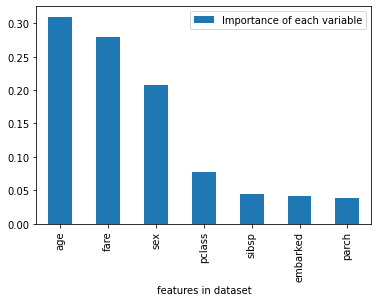

In [17]:
#Feature importances of Random Forest Classifier to study the impact of each attribute in the prediction of survival
RandomForestClassifier = classifier_accuracy_results[4]
feature_importances = pd.DataFrame({'features in dataset':titanic.iloc[:,1:8].columns,
                                    'Importance of each variable': np.round(RandomForestClassifier.feature_importances_,3)})
feature_importances = feature_importances.sort_values('Importance of each variable',ascending=False).set_index('features in dataset')
feature_importances.plot.bar()
feature_importances

In [18]:
#Predicting chances of survival for 'Rose' 
Predict_Rose_survival=[[1,0,20,1,0,100,0]]

prediction_val=classifier_accuracy_results[1].predict(Predict_Rose_survival)
print(prediction_val)

if prediction_val==0:
  print('Sorry! You did not survive!!!')
else:
  print('Great News! You survived!')

[1.]
Great News! You survived!


In [19]:
#Predicting chances of survival for 'Jack' 
Predict_Jack_survival=[[3,1,23,1,0,5,0]]

prediction_val=classifier_accuracy_results[1].predict(Predict_Jack_survival)
print(prediction_val)

if prediction_val==0:
  print('Sorry! You did not survive!!!')
else:
  print('Great News! You survived!')

[0.]
Sorry! You did not survive!!!


In [20]:
# Predict survival using Tensorflow's high level API with keras
#using tf.keras 

#Creating independent and dependent data variables
def create_Xvar_Yvar(titanic, total_size):
	Yvars = []
	for i in range(0, total_size):
		if i in titanic.index:
			Yvar = np.zeros(2)
			if titanic.at[i, 'survived'] == 0:
				Yvar[0] = 1.0
			elif titanic.at[i, 'survived'] == 1:
				Yvar[1] = 1.0
			Yvars.append(Yvar)
	Yvars = np.array(Yvars)
	
	Xvar = titanic.drop(columns=['survived'])
	Xvar = np.array(Xvar)
	
	return Xvar, Yvars

#generate training and test data after preprocessing the data 
#preprocessing donw with the help of preprocessing functions declared above
def generate_dataset(input):
  total_size = len(input)
	#dropping unwanted attributes
  input = drop_unused_columns(input)
	#dropping rows with 'na'
  input = drop_rows_with_na(input)
	#convert categorical attributes to numeric datatype	
  input = convert_categorical_to_numbers(input)
  return create_Xvar_Yvar(input, total_size)

#read titanic daatset
titanic = pd.read_csv('titanic.csv')

#randomly select 80% for training
indices = np.random.rand(len(titanic)) <= 0.8

#creating training dataset
training_data = titanic[indices]
training_data = training_data.reset_index(drop=True)

#creating testing dataset
test_data = titanic[~indices]
test_data = test_data.reset_index(drop=True)

train_Xvars, train_Yvars = generate_dataset(training_data)
test_Xvars, test_Yvars = generate_dataset(test_data)

#creating a sequential model using tf.keras
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(500, activation='relu', input_shape=[7,]))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#initializing metric variables
total_training_accuracy = 0.0
total_validation_accuracy = 0.0
total_test_accuracy = 0.0

#using the sequential model created above
for _ in range(0, 1):
	history = model.fit(train_Xvars, train_Yvars, epochs=70, batch_size=10, validation_split=0.2)
	dictionary = pd.DataFrame(history.history)
  
	#Calculating mean accuracy and validation of mean accuracy
	total_training_accuracy += dictionary['accuracy'].mean()
	total_validation_accuracy += dictionary['val_accuracy'].mean()
 
  #evaluate the model
	testing_loss, testing_accuracy = model.evaluate(test_Xvars, test_Yvars)

	total_test_accuracy += testing_accuracy

#Priting model metrics obtained
print('Training mean accuracy: ' + str(total_training_accuracy))
print('Validation mean accuracy: ' + str(total_validation_accuracy))
print('Testing mean accuracy: ' + str(total_test_accuracy))

#append the accuracy for the model for furture visulaization
all_accuracies['Sequential Neural Network'] = total_training_accuracy


Epoch 1/70
66/66 [==============================] - 1s 8ms/step - loss: 1.4329 - accuracy: 0.5810 - val_loss: 0.6635 - val_accuracy: 0.6524
Epoch 2/70
66/66 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6315 - val_loss: 0.6593 - val_accuracy: 0.6037
Epoch 3/70
66/66 [==============================] - 0s 5ms/step - loss: 0.6242 - accuracy: 0.6697 - val_loss: 0.6639 - val_accuracy: 0.6280
Epoch 4/70
66/66 [==============================] - 0s 5ms/step - loss: 0.6236 - accuracy: 0.6728 - val_loss: 0.6579 - val_accuracy: 0.6646
Epoch 5/70
66/66 [==============================] - 0s 5ms/step - loss: 0.6323 - accuracy: 0.6468 - val_loss: 0.6812 - val_accuracy: 0.6707
Epoch 6/70
66/66 [==============================] - 0s 5ms/step - loss: 0.6201 - accuracy: 0.6743 - val_loss: 0.7114 - val_accuracy: 0.5549
Epoch 7/70
66/66 [==============================] - 0s 5ms/step - loss: 0.6139 - accuracy: 0.6804 - val_loss: 0.6909 - val_accuracy: 0.6341
Epoch 8/70
66/66 [==

In [21]:
#Predicting chances of survival for 'Rose' using tf.keras.Sequential model
Predict_Rose_survival=[[1,0,20,1,0,100,0]]
predictions = model.predict(Predict_Rose_survival)
print('predictions',predictions)

predictions [[0.1630439 0.8369561]]


In [22]:
#Predicting chances of survival for 'Jack' using tf.keras.Sequential model
Predict_Jack_survival=[[3,1,23,1,0,5,0]]
predictions = model.predict(Predict_Jack_survival)
print('predictions',predictions)

predictions [[0.8870739  0.11292607]]


In [0]:
# Predict using Tensflow estimator for Boostedtrees
from IPython.display import clear_output

#Read the titanic dataset
titanic = pd.read_csv('titanic.csv')

#drop unwanted attributes
titanic = drop_unused_columns(titanic)

#drop rows with 'na'
titanic = drop_rows_with_na(titanic)

# reorder the columns
titanic = reorder_columns(titanic)

#Divide the dataset for 80% training and 20% testing
indices = np.random.rand(len(titanic)) <= 0.8

#process of creating training and testing dataset
train_Xvars = titanic[indices]
train_Xvars = train_Xvars.reset_index(drop=True)
train_Xvars = train_Xvars.astype({'pclass': 'int32','sibsp': 'int32','parch': 'int32'})

test_Xvars = titanic[~indices]
test_Xvars = test_Xvars.reset_index(drop=True)
test_Xvars = test_Xvars.astype({'pclass': 'int32','sibsp': 'int32', 'parch': 'int32'})

train_Yvars = train_Xvars.pop('survived')
test_Yvars = test_Xvars.pop('survived')

#Feature extraction - using only what is required and manipulating the data
categorical_features = ['pclass', 'sex', 'sibsp', 'parch','embarked']
numeric_features = ['age', 'fare']
 
features = []
for feature in categorical_features:
  vocabulary = train_Xvars[feature].unique()
  features.append(tf.feature_column.indicator_column(
      tf.feature_column.categorical_column_with_vocabulary_list(feature,
                                                 vocabulary)))

for feature in numeric_features:
  features.append(tf.feature_column.numeric_column(feature,
                                           dtype=tf.float32))
  
#Processing the dataset using methods, shuffle, repeat and batch
def process_dataset(X, Y, number_of_epochs=None, shuffle=True):
  def process():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), Y))
    if shuffle:
      dataset = dataset.shuffle(len(train_Yvars))
    dataset = dataset.repeat(number_of_epochs)
    dataset = dataset.batch(len(train_Yvars))
    return dataset
  return process

#obtaining training and testing data
training = process_dataset(train_Xvars, train_Yvars)
testing = process_dataset(test_Xvars, test_Yvars,number_of_epochs=1, shuffle=False)

#Using Linear Classifier estimator from TensorFlow estimator API
linear_estimator = tf.estimator.LinearClassifier(features)
linear_estimator.train(training, max_steps=10)

#evaluate the results for linear estimator
linear_result = linear_estimator.evaluate(testing)

#Using Boosted Tree Classifier estimator from TensorFlow estimator API
params = {'n_trees': 50, 'max_depth': 3,'n_batches_per_layer': 1,'center_bias': True}

boosted_trees_estimator = tf.estimator.BoostedTreesClassifier(features,
                                          **params)
boosted_trees_estimator.train(training, max_steps=100)

#evaluate the results for boosted tree estimator
boosted_tree_result = boosted_trees_estimator.evaluate(testing)
clear_output()


In [24]:
#Printing the results
print('Linear estimator results')
print(pd.Series(linear_result))
print('---------------------------------------')
print('Boosted Tree estimator results')
print(pd.Series(boosted_tree_result))

#append the accuracy to the object for furture visualization
all_accuracies['Linear estimator']=linear_result['accuracy']
all_accuracies['Boosted tree estimator']=boosted_tree_result['accuracy']

Linear estimator results
accuracy                 0.691099
accuracy_baseline        0.607330
auc                      0.720977
auc_precision_recall     0.640048
average_loss             0.692175
label/mean               0.392670
loss                     0.692175
precision                0.785714
prediction/mean          0.229055
recall                   0.293333
global_step             10.000000
dtype: float64
---------------------------------------
Boosted Tree estimator results
accuracy                  0.748691
accuracy_baseline         0.607330
auc                       0.813333
auc_precision_recall      0.798630
average_loss              0.495477
label/mean                0.392670
loss                      0.495477
precision                 0.714286
prediction/mean           0.394679
recall                    0.600000
global_step             100.000000
dtype: float64


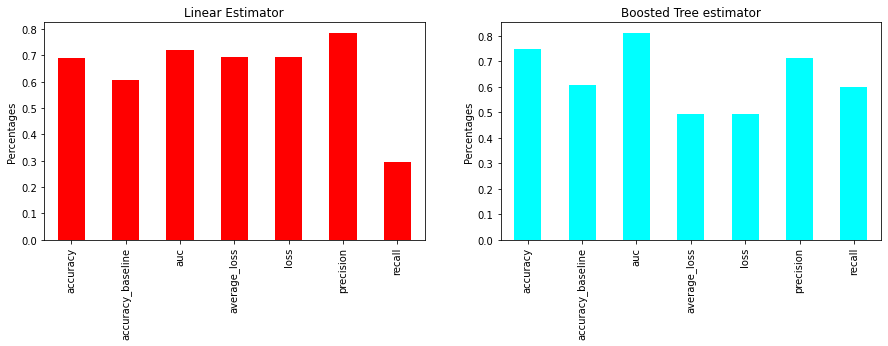

In [25]:
#Plotting linear regression estimator vs Boosted Tree estimator for the result metrics
fig, matplotlib_Axes = plt.subplots(1, 2, figsize = (15, 4))

linear_result = pd.Series(linear_result)
linear_result=linear_result.drop(['global_step','auc_precision_recall','label/mean','prediction/mean'])
linear_result.plot.bar(color = "#FF0000", ax = matplotlib_Axes[0])
matplotlib_Axes[0].set_title("Linear Estimator")
matplotlib_Axes[0].set_ylabel("Percentages")

boosted_tree_result = pd.Series(boosted_tree_result)
boosted_tree_result = boosted_tree_result.drop(['global_step','auc_precision_recall','label/mean','prediction/mean'])
boosted_tree_result.plot.bar(color = "#00FFFF", ax = matplotlib_Axes[1])
matplotlib_Axes[1].set_title("Boosted Tree estimator")
matplotlib_Axes[1].set_ylabel("Percentages")
plt.show()

sex         0.394744
pclass      0.238496
age         0.169247
fare        0.118588
sibsp       0.046204
embarked    0.019582
parch       0.013138
dtype: float64

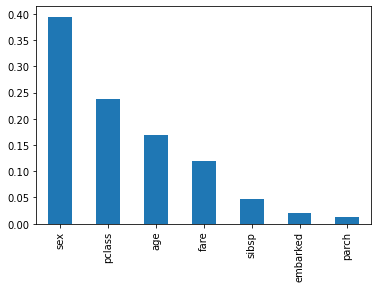

In [26]:
#Feature importances of Boosted Trees Classifier
feature_importances = boosted_trees_estimator.experimental_feature_importances(normalize=True)
feature_importances = pd.Series(feature_importances)
feature_importances.plot.bar()
feature_importances


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpszwzph2z/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


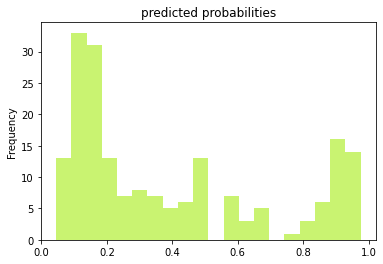

In [27]:
#Prediction based on testing dataset and plotting the predicted probabilities
predictions = list(boosted_trees_estimator.predict(testing))
probabilities = pd.Series([pred['probabilities'][1] for pred in predictions])
probabilities.plot(kind='hist', bins=20, title='predicted probabilities',color='#C9F371')
plt.show()

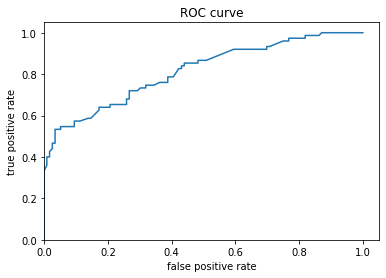

In [28]:
#ROC curve for Boosted Tree Classifier to evaluate performance
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(test_Yvars, probabilities)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

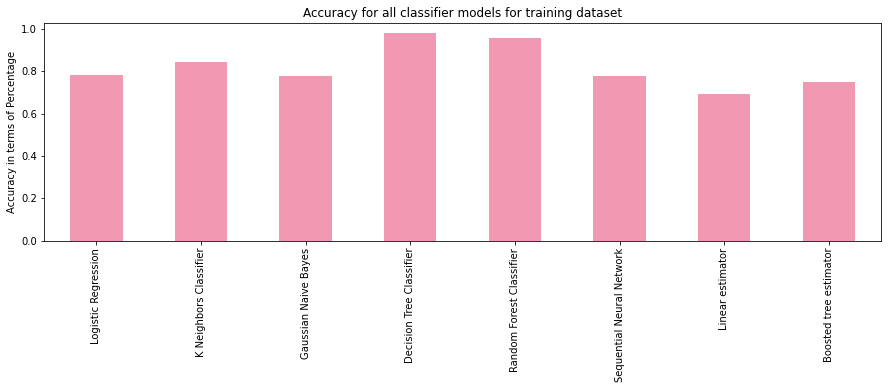

In [29]:
#summarizing all the accuracies obtained from the models above for better comparisons
fig, matplotlib_Axes = plt.subplots(1, figsize = (15, 4))
all_accuracies = pd.Series(all_accuracies)
all_accuracies.plot.bar(color = "#f199B3")
matplotlib_Axes.set_title('Accuracy for all classifier models for training dataset')
matplotlib_Axes.set_ylabel('Accuracy in terms of Percentage')
plt.show()